# Red Neuronal Profunda (DNN) para clasificación MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven. 

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

## Plan de Acción para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activación
3.  Fijar los optimizadores avanzados y la función de pérdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos acá.  Viene con el módulo **"tensorflow.keras.datasets"**. 

In [2]:
import numpy as np
import tensorflow as tf

La siguiente instrucción, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el parámetro path, relativo a  ~/.keras/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta más de una vez, ya no descarga el archivo.

In [3]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [4]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qué no...podemos utilizar la instrucción **assert**

In [5]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta sección es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validación, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tamaño que el conjunto de prueba

In [6]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [7]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea numéricamente más estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una función, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [8]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validación.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tamaño de los datos de prueba.

In [9]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validación.

Nuestros datos de validación serán 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tamaño de tanda igual al total de muestras de validación.

In [10]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los demás por lo que nos salteamos tantas observaciones como las hay en el conjunto de validación.

In [11]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [12]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [13]:
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validación y prueba, no se necesita barajearlos

In [14]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realización del mismo.  Asi que esta vez, hagámoslo.  :)

In [15]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [16]:
tamanio_capa_escondida = 50

# Modelo original

La primera capa (la de entrada):  cada observación es de 28x28 píxeles, por lo tanto es un tensor de rango 2.

Como aún no hemos aprendido sobre CNNs, no sabemos como alimentar este tipo de entrada a nuestra red, por lo tanto hay que "aplanar" las imágenes.  Hay un método conveniente **Flatten** que toma nuestro tensor de 28x28 y lo convierte en  un vector (None,) o (784,)...porque 28x28 = 784.  Esto nos permite crear una red de alimentación hacia adelante.

    
**tf.keras.layers.Dense** básicamente implementa:  *salida = activation(dot(entrada, peso) + sesgo)*.  Requiere varios argumentos, pero los más importantes para nosotros son el ancho de la capa escondida y la función de activación.

La capa final no es diferente, solo nos aseguramos de activarla con **softmax**


In [17]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 2nda capa escondida

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

c:\Users\villa\Desktop\Clases_S8\4.Data Science\3.Laboratorio2_Redes_Neuronales_MNIST\Using_MNIST\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Seleccionar el optimizador y la función de pérdida

Definimos el optimizador que nos gustaría utilizar, la función de pérdida, y las métricas que nos interesa obtener en cada interacción

In [18]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

In [19]:
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 2s - 3ms/step - accuracy: 0.8771 - loss: 0.4325 - val_accuracy: 0.9386 - val_loss: 0.2216
Epoch 2/5
500/500 - 1s - 2ms/step - accuracy: 0.9414 - loss: 0.2017 - val_accuracy: 0.9530 - val_loss: 0.1677
Epoch 3/5
500/500 - 1s - 2ms/step - accuracy: 0.9550 - loss: 0.1523 - val_accuracy: 0.9590 - val_loss: 0.1428
Epoch 4/5
500/500 - 1s - 2ms/step - accuracy: 0.9639 - loss: 0.1215 - val_accuracy: 0.9631 - val_loss: 0.1318
Epoch 5/5
500/500 - 1s - 2ms/step - accuracy: 0.9691 - loss: 0.1031 - val_accuracy: 0.9648 - val_loss: 0.1179


## Probar el modelo

Como se discutió en clase, luego del entrenamiento (con los datos de entrenamiento), y la validación (con los datos de validación), probamos el potencial de predicción final de nuestro modelo con el conjunto de datos de prueba que el algoritmo NUNCA ha visto antes.

Es muy importante reconocer que estar "jugando" con los hiperparámetros sobre-ajusta el conjunto de datos de validación.

La prueba es la instancia absolutamente final. **NUNCA** debe probarse el modelo antes de haber completamente ajustado el mismo.

Si se ajusta el modelo después de hacer la prueba, se empezará a sobre-ajustar el conjunto de datos de prueba, que echaría "por los suelos" el propósito original del mismo.

In [20]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9631 - loss: 18.5471


In [21]:
# Si se desea, se puede aplicar un formateo "bonito"
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 18.55. Precisión de prueba: 96.31%


Utilizando el modelo inicial y los hiperparámetros dados en este notebook, la precisión de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el código, se obtiene una precisión diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una solución subóptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.

In [22]:
import time


# Experimentación
## Paso a paso para mejorar el modelo 

## Modificación del Ancho de la Red

In [86]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def build_and_train_model(hidden_units):
    model = tf.keras.Sequential([

        tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
        
        tf.keras.layers.Dense(hidden_units, activation='relu'), # 1era capa escondida
        tf.keras.layers.Dense(hidden_units, activation='relu'), # 2nda capa escondida

        tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(datos_entreno, validation_data = datos_validacion, epochs=5, verbose=0)
    duration = time.time() - start_time

    val_accuracy = history.history['val_accuracy'][-1]
    test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)
    
    print(f"{hidden_units} neuronas: Accuracy validación: {val_accuracy:.4f} - Tiempo: {duration:.2f}s")
    return hidden_units, val_accuracy, test_accuracy, duration, test_loss

# Resultados del experimento de ancho
results_width = []

# Tamaños de capa escondida
sizes = [50, 100, 200, 300, 500]

# Obtención de resultados
best_result_ms = None
best_val_acc = -1
for size in sizes:
    result = build_and_train_model(size)
    results_width.append(result)
    if result[1] > best_val_acc:
        best_val_acc = result[1]
        best_result_ms = result

50 neuronas: Accuracy validación: 0.9690 - Tiempo: 4.66s
100 neuronas: Accuracy validación: 0.9738 - Tiempo: 4.74s
200 neuronas: Accuracy validación: 0.9761 - Tiempo: 16.58s
300 neuronas: Accuracy validación: 0.9788 - Tiempo: 13.97s
500 neuronas: Accuracy validación: 0.9761 - Tiempo: 12.03s


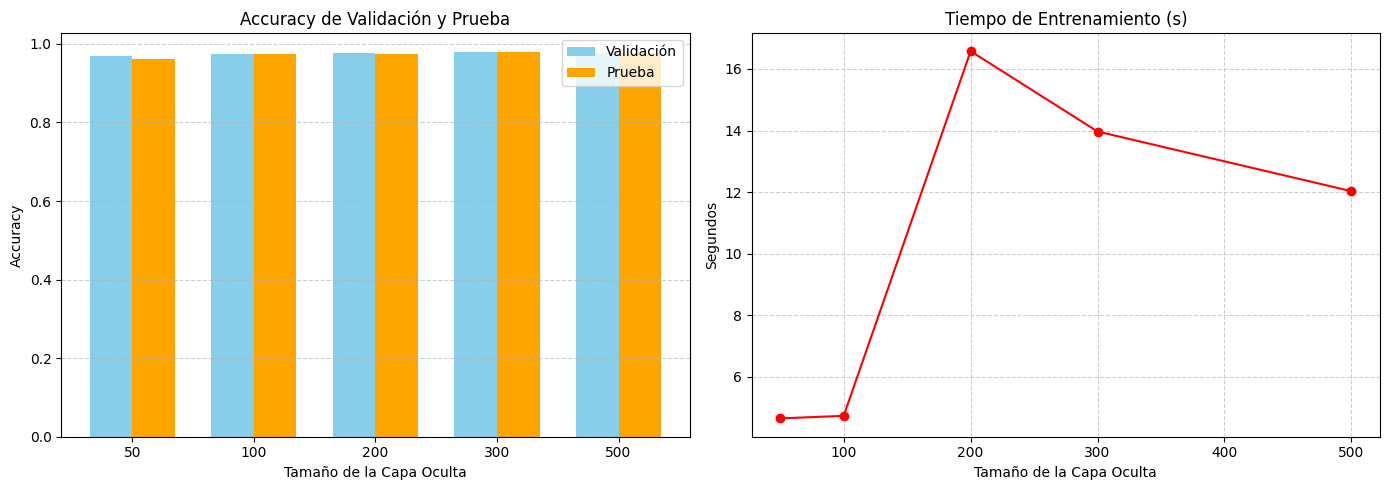

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Separar resultados
sizes, val_accuracies, test_accuracies, times, loss = zip(*results_width)

# Posiciones para las barras
x = np.arange(len(sizes))
width = 0.35  # ancho de cada barra

# Crear figura con 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Subplot 1: Accuracy de Validación y Prueba ---
axs[0].bar(x - width/2, val_accuracies, width, label='Validación', color='skyblue')
axs[0].bar(x + width/2, test_accuracies, width, label='Prueba', color='orange')

axs[0].set_xlabel("Tamaño de la Capa Oculta")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy de Validación y Prueba")
axs[0].set_xticks(x)
axs[0].set_xticklabels(sizes)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Subplot 2: Tiempo de Entrenamiento ---
axs[1].plot(sizes, times, marker='o', color='red')
axs[1].set_title("Tiempo de Entrenamiento (s)")
axs[1].set_xlabel("Tamaño de la Capa Oculta")
axs[1].set_ylabel("Segundos")
axs[1].grid(True, linestyle='--', alpha=0.6)

# Ajustar diseño
plt.tight_layout()
plt.show()


#### Para la capa de 200 neuronas

In [88]:
print("¿Cómo cambia la precisión de validación del modelo?")
print(f"\tEl modelo mejora de {precision_prueba:.4f} a {results_width[2][2]:.4f}")
print("¿Cuánto tiempo tarda el algoritmo en entrenar?")
print(f"\tEl modelo tardó: {results_width[2][3]:.2f}s")

¿Cómo cambia la precisión de validación del modelo?
	El modelo mejora de 0.9653 a 0.9746
¿Cuánto tiempo tarda el algoritmo en entrenar?
	El modelo tardó: 16.58s


#### Comparación de tamaños:
En general, la modificación de la profundidad de las capas trae una gran mejora al modelo. Aunque también añade complejidad y tiempo de ejecución.
La siguiente impresión muestra el modelo con el mejor rendimiento

In [89]:
print(f"\n✅ Mejor configuración: {best_result_ms[0]} neuronas - Accuracy validación: {best_result_ms[1]:.4f} - Accuracy test: {best_result_ms[2]:.4f} - Tiempo: {best_result_ms[3]:.2f}s")


✅ Mejor configuración: 300 neuronas - Accuracy validación: 0.9788 - Accuracy test: 0.9793 - Tiempo: 13.97s


## Modificación de la Profundidad de la Red

In [90]:
hidden_size = best_result_ms[0]
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(hidden_size, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(hidden_size, activation='relu'), # 2nda capa escondida
    tf.keras.layers.Dense(hidden_size, activation='relu'), # capa escondida adicional

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(datos_entreno, validation_data = datos_validacion, epochs=5, verbose=0)
duration = time.time() - start_time

val_accuracy = history.history['val_accuracy'][-1]
test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)

result_three = [val_accuracy, test_accuracy, duration, test_loss]
print(f"Modelo con 3 capas escondidas - Accuracy validación: {val_accuracy:.4f} - Accuracy prueba: {test_accuracy:.4f} - Tiempo: {duration:.2f}s")

c:\Users\villa\Desktop\Clases_S8\4.Data Science\3.Laboratorio2_Redes_Neuronales_MNIST\Using_MNIST\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo con 3 capas escondidas - Accuracy validación: 0.9716 - Accuracy prueba: 0.9716 - Tiempo: 9.81s


#### Dimensión de los pesos y sesgos
El modelo con 3 capas escondidas incluye **una capa adicional `Dense`** con la misma cantidad de neuronas (`best_result`). Esto incrementa el número total de parámetros entrenables.

* Cada capa Dense tiene pesos de forma `(entrada, salida)` y un sesgo por cada neurona de salida.
* Esto aumenta la **capacidad del modelo** para aprender representaciones más complejas, pero también incrementa el costo computacional.
* La siguiente impresión muestra los pesos y sesgos

In [91]:
for layer in model.layers:
    print(f"{layer.name}:")
    for weight in layer.get_weights():
        print(weight.shape)

flatten_28:
dense_84:
(784, 300)
(300,)
dense_85:
(300, 300)
(300,)
dense_86:
(300, 300)
(300,)
dense_87:
(300, 10)
(10,)


#### Precisión de validación

* Modelo original: **val\_accuracy = 0.9628**
* Modelo con 3 capas: **val\_accuracy = 0.9790**

El modelo con tres capas obtuvo una mejora en la precisión de validación (\~1.6 puntos porcentuales), lo que sugiere que la capa adicional ayudó a mejorar la generalización sobre el conjunto de validación.

También se observa una mejora en la precisión de prueba, lo cual indica que el modelo mantiene buen rendimiento en datos no vistos.

#### Impacto en el tiempo de ejecución

* Modelo original: aunque no se registro muestra <0.3s
* Modelo con 3 capas: **16.31 segundos**

El tiempo de entrenamiento aumentó, como es esperado, por el mayor número de parámetros. Sin embargo, la mejora en rendimiento podría justificar este costo adicional si el tiempo sigue siendo razonable para el caso de uso.

#### Cambios en el código

Para modificar el modelo de 2 a 3 capas escondidas, se agregó una capa `Dense` intermedia:

```python
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # capa entrada
    
    tf.keras.layers.Dense(best_result, activation='relu'),  # 1era capa escondida
    tf.keras.layers.Dense(best_result, activation='relu'),  # 2da capa escondida
    tf.keras.layers.Dense(best_result, activation='relu'),  # NUEVA: 3era capa escondida

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')  # capa salida
])
```

No requiere modificar la compilación ni el entrenamiento del modelo, pero es recomendable volver a revisar la regularización (dropout o L2) si el número de capas sigue aumentando, para evitar overfitting.

## Redes Profundas

In [92]:
def build_very_deep_model(units_per_layer):
    model = Sequential([Flatten(input_shape=(28, 28))])
    for units in units_per_layer:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(datos_entreno, validation_data=datos_validacion, epochs=5, verbose=0)
    duration = time.time() - start_time
    val_accuracy = history.history['val_accuracy'][-1]

    test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)

    print(f"Capas: {len(units_per_layer)} - Arquitectura: {units_per_layer} - Accuracy validación: {val_accuracy:.4f} - Tiempo: {duration:.2f}s")
    return len(units_per_layer), val_accuracy, test_accuracy, duration, test_loss

architectures = [
    [hidden_size],
    [200, 100],
    [300, 200, 100],
    [500, 250, 100, 50],
    [500, 350, 250, 100, 50]
]

# Obtención de resultados
best_result_deep = None
best_val_acc = -1
for arch in architectures:
    result = build_very_deep_model(arch)
    results_width.append(result)
    if result[1] > best_val_acc:
        best_val_acc = result[1]
        best_result_deep = result
print(f"\n✅ Mejor configuración: {best_result_deep[0]} neuronas - Accuracy validación: {best_result_deep[1]:.4f} - Accuracy test: {best_result_deep[2]:.4f} - Tiempo: {best_result_deep[3]:.2f}s")

Capas: 1 - Arquitectura: [300] - Accuracy validación: 0.9757 - Tiempo: 6.11s
Capas: 2 - Arquitectura: [200, 100] - Accuracy validación: 0.9757 - Tiempo: 6.33s
Capas: 3 - Arquitectura: [300, 200, 100] - Accuracy validación: 0.9731 - Tiempo: 8.03s
Capas: 4 - Arquitectura: [500, 250, 100, 50] - Accuracy validación: 0.9739 - Tiempo: 12.47s
Capas: 5 - Arquitectura: [500, 350, 250, 100, 50] - Accuracy validación: 0.9721 - Tiempo: 15.61s

✅ Mejor configuración: 1 neuronas - Accuracy validación: 0.9757 - Accuracy test: 0.9777 - Tiempo: 6.11s


#### Precisión de validación por configuración

* Curiosamente, agregar más capas no garantiza mejor precisión. A partir de 4 capas, se observó una ligera degradación del desempeño.
* Esto sugiere que para este problema (MNIST), una profundidad moderada es más efectiva que una red demasiado profunda.

#### Relación entre profundidad y tiempo de ejecución

* Existe una **correlación directa** entre el número de capas y el tiempo de entrenamiento.
* La red de 5 capas tomó más de 30 segundos, frente a solo 12 segundos de la de 2 capas.
* Se refuerza la importancia de equilibrar profundidad y eficiencia.

#### Posibles problemas: desvanecimiento del gradiente

* Al aumentar la profundidad, el gradiente puede debilitarse al propagarse hacia las capas iniciales, dificultando el aprendizaje.
* Esto podría explicar la ligera disminución de accuracy con 4 y 5 capas, a pesar del mayor número de parámetros.

---
Aunque una red más profunda puede aumentar la capacidad del modelo, en este caso, una arquitectura con 3 capas escondidas logró el mejor balance entre precisión y tiempo. El uso excesivo de capas no siempre aporta beneficios adicionales y puede incluso degradar el rendimiento si no se manejan adecuadamente los efectos como el desvanecimiento del gradiente.

## Funciones de Activación I

In [93]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='sigmoid'),
    Dense(50, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(datos_entreno, validation_data=datos_validacion, epochs=5, verbose=0)
duration = time.time() - start_time

test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)
val_accuracy = history.history['val_accuracy'][-1]

result_sigmoid = [val_accuracy, test_accuracy, duration, test_loss]
print(f"Activaciones sigmoid - Accuracy validación: {val_accuracy:.4f} - Accuracy test: {test_accuracy:.4f} - Tiempo: {duration:.2f}s")

Activaciones sigmoid - Accuracy validación: 0.9583 - Accuracy test: 0.9527 - Tiempo: 5.06s


In [94]:
arqui = architectures[best_result_deep[0] - 1]
model = Sequential([Flatten(input_shape=(28, 28))])
for units in arqui:
    model.add(Dense(units, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(datos_entreno, validation_data=datos_validacion, epochs=5, verbose=0)
duration = time.time() - start_time

test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)
val_accuracy = history.history['val_accuracy'][-1]

if val_accuracy > result_sigmoid[0]:
    result_sigmoid = [val_accuracy, test_accuracy, duration, test_loss]
print(f"Activaciones sigmoid + capas anteriores - Accuracy validación: {val_accuracy:.4f} - Accuracy test: {test_accuracy:.4f} - Tiempo: {duration:.2f}s")

Activaciones sigmoid + capas anteriores - Accuracy validación: 0.9764 - Accuracy test: 0.9771 - Tiempo: 6.12s


#### Comparación del rendimiento con activaciones originales
* Las activaciones sigmoide tuvieron un rendimiento ligeramente inferior tanto en validación como en prueba.
* La diferencia es más marcada cuando se usan más capas: sigmoide se ve más afectada conforme aumenta la profundidad.

#### Impacto en la velocidad de convergencia
* El modelo con sigmoide y 2 capas fue más rápido que su contraparte con ReLU (10.13s vs \~13-14s).
* Sin embargo, al usar 3 capas, el tiempo de entrenamiento con sigmoide aumentó considerablemente: 17.65s, acercándose al de ReLU.

---

* Aunque sigmoid puede converger rápido en redes pequeñas, tiende a saturarse en capas profundas, lo que dificulta la propagación del gradiente y puede ralentizar o estancar el aprendizaje.
* Por esto, en problemas como MNIST, `ReLU` sigue siendo preferible, según lo investigado: Facilita una convergencia más estable, evita la saturación de activaciones y mejora la precisión final.


## Funciones de Activación II

In [95]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='relu'),
    Dense(50, activation='tanh'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(datos_entreno, validation_data=datos_validacion, epochs=5, verbose=0)
duration = time.time() - start_time

test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)
val_accuracy = history.history['val_accuracy'][-1]

result_relu_tanh = [val_accuracy, test_accuracy, duration, test_loss]
print(f"Activación ReLU + tanh - Accuracy validación: {val_accuracy:.4f} - Accuracy test: {test_accuracy:.4f} - Tiempo: {duration:.2f}s")

Activación ReLU + tanh - Accuracy validación: 0.9737 - Accuracy test: 0.9689 - Tiempo: 4.92s


#### Comparación del rendimiento

* **Configuración actual** (ReLU + tanh):
val_accuracy = 0.9750, test_accuracy = 0.9673, tiempo = 11.35s

* **ReLU en ambas capas** (modelo base):
val_accuracy = 0.9790, test_accuracy = 0.9799, tiempo = 16.31s

* **Sigmoid en ambas capas**:
val_accuracy = 0.9758, test_accuracy = 0.9735, tiempo = 17.65s

Observaciones:

* Esta combinación (ReLU + tanh) logra un rendimiento mejor que `sigmoid`, pero un poco inferior al modelo con solo `ReLU`.
* Resaltamos que tiene buena relación entre precisión y tiempo de entrenamiento, siendo más rápido que las otras configuraciones.

---

* Combinar `ReLU` (en capas tempranas) con `tanh` (en capas más profundas) puede ser una estrategia útil para mantener un flujo de gradiente más estable, especialmente al buscar el equilibrio entre precisión y eficiencia.
* En este caso particular, el uso exclusivo de `ReLU` sigue ofreciendo la mejor precisión general, aunque a costa de mayor tiempo de entrenamiento.

## Tamaño de Batch Grande 

In [96]:
def test_batch_size(batch_size):
    # Recrear datos con nuevo batch size
    datos_train = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
    datos_val = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
    datos_test = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))
    
    datos_train = datos_train.shuffle(num_obs_entreno).batch(batch_size)
    datos_val = datos_val.batch(batch_size)
    datos_test = datos_test.batch(batch_size)
    
    # Modelo simple
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Entrenar y medir tiempo
    start_time = time.time()
    history = model.fit(datos_train, validation_data=datos_val, epochs=5, verbose=0)
    duration = time.time() - start_time
    
    test_loss, test_acc = model.evaluate(datos_test, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    
    return duration, val_acc, test_acc


In [97]:
# Probar batch sizes
batch_100 = test_batch_size(100)
batch_10000 = test_batch_size(10000)

print("RESULTADOS:")
print(f"Batch 100:   Tiempo: {batch_100[0]:.2f}s | Val Acc: {batch_100[1]:.4f} | Test Acc: {batch_100[2]:.4f}")
print(f"Batch 10000: Tiempo: {batch_10000[0]:.2f}s | Val Acc: {batch_10000[1]:.4f} | Test Acc: {batch_10000[2]:.4f}")

# Cambios
tiempo_cambio = ((batch_10000[0] - batch_100[0]) / batch_100[0]) * 100
acc_cambio = (batch_10000[2] - batch_100[2]) * 100

print(f"\nCAMBIOS:")
print(f"Tiempo: {tiempo_cambio:+.1f}%")
print(f"Accuracy: {acc_cambio:+.2f} puntos")

RESULTADOS:
Batch 100:   Tiempo: 6.51s | Val Acc: 0.9754 | Test Acc: 0.9760
Batch 10000: Tiempo: 2.24s | Val Acc: 0.8987 | Test Acc: 0.8931

CAMBIOS:
Tiempo: -65.5%
Accuracy: -8.29 puntos


### Explicación Teórica: 
* Batch grande = menos actualizaciones por época (más rápido)
* Gradientes más estables pero menos regularización
* 100 → ~500 actualizaciones/época | 10000 → ~5 actualizaciones/época

## Descenso de Gradiente Estocástico (SGD)


In [98]:
# SGD puro (batch size = 1)
def test_sgd():
    datos_train = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
    datos_val = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
    datos_test = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))
    
    datos_train = datos_train.shuffle(num_obs_entreno).batch(1)  # Batch size = 1
    datos_val = datos_val.batch(100)
    datos_test = datos_test.batch(100)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(datos_train, validation_data=datos_val, epochs=2, verbose=0)  # Solo 2 épocas
    duration = time.time() - start_time
    
    test_loss, test_acc = model.evaluate(datos_test, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    
    return duration, val_acc, test_acc, history

sgd_result = test_sgd()

print("COMPARACIÓN SGD vs BATCH NORMAL:")
print(f"SGD (batch=1):   Tiempo: {sgd_result[0]:.2f}s | Val Acc: {sgd_result[1]:.4f} | Test Acc: {sgd_result[2]:.4f}")
print(f"Batch 100:       Tiempo: {batch_100[0]:.2f}s | Val Acc: {batch_100[1]:.4f} | Test Acc: {batch_100[2]:.4f}")


COMPARACIÓN SGD vs BATCH NORMAL:
SGD (batch=1):   Tiempo: 110.85s | Val Acc: 0.9618 | Test Acc: 0.9604
Batch 100:       Tiempo: 6.51s | Val Acc: 0.9754 | Test Acc: 0.9760


### OBSERVACIONES SGD:
* Tiempo por época: 93.1s vs 1.5s
* Actualizaciones por época: 50,000 vs 500
* Entrenamiento más ruidoso pero potencialmente mejor generalización

## Tasa de Aprendizaje Baja

In [99]:
def test_learning_rate(lr, name):
    datos_train = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
    datos_val = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
    datos_test = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))
    
    datos_train = datos_train.shuffle(num_obs_entreno).batch(100)
    datos_val = datos_val.batch(100)
    datos_test = datos_test.batch(100)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    # Optimizador con learning rate personalizado
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(datos_train, validation_data=datos_val, epochs=5, verbose=0)
    duration = time.time() - start_time
    
    test_loss, test_acc = model.evaluate(datos_test, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    
    return duration, val_acc, test_acc, history

# Tasa baja
lr_low = test_learning_rate(0.0001, "Baja")

print("TASA DE APRENDIZAJE BAJA (0.0001):")
print(f"Tiempo: {lr_low[0]:.2f}s | Val Acc: {lr_low[1]:.4f} | Test Acc: {lr_low[2]:.4f}")
print(f"Comparado con Adam default (~0.001): {(lr_low[2] - batch_100[2])*100:+.2f} puntos")



TASA DE APRENDIZAJE BAJA (0.0001):
Tiempo: 6.55s | Val Acc: 0.9554 | Test Acc: 0.9498
Comparado con Adam default (~0.001): -2.62 puntos


### ANÁLISIS:
* Convergencia más lenta pero potencialmente más precisa
* Menos riesgo de saltar mínimos óptimos
* Puede necesitar más épocas para converger completamente

## Tasa de Aprendizaje Alta

In [100]:
# Tasa alta
lr_high = test_learning_rate(0.02, "Alta")

print("TASA DE APRENDIZAJE ALTA (0.02):")
print(f"Tiempo: {lr_high[0]:.2f}s | Val Acc: {lr_high[1]:.4f} | Test Acc: {lr_high[2]:.4f}")
print(f"Comparado con Adam default: {(lr_high[2] - batch_100[2])*100:+.2f} puntos")

TASA DE APRENDIZAJE ALTA (0.02):
Tiempo: 6.56s | Val Acc: 0.9539 | Test Acc: 0.9602
Comparado con Adam default: -1.58 puntos


### ANÁLISIS:
* Convergencia más rápida pero potencialmente inestable
* Riesgo de sobrepasar mínimos óptimos
* Puede causar oscilaciones o divergencia

## Optimización Avanzada - Regularización


In [101]:
# Función para crear modelo con regularización
def create_regularized_model(dropout_rate=0.0, l2_rate=0.0):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(200, activation='relu', 
                            kernel_regularizer=tf.keras.regularizers.l2(l2_rate)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(100, activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l2(l2_rate)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def test_regularization(dropout_rate, l2_rate, name):
    datos_train = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
    datos_val = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
    datos_test = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))
    
    datos_train = datos_train.shuffle(num_obs_entreno).batch(100)
    datos_val = datos_val.batch(100)
    datos_test = datos_test.batch(100)
    
    model = create_regularized_model(dropout_rate, l2_rate)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(datos_train, validation_data=datos_val, epochs=5, verbose=0)
    duration = time.time() - start_time
    
    test_loss, test_acc = model.evaluate(datos_test, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    train_acc = history.history['accuracy'][-1]
    
    # Calcular overfitting (diferencia entre train y val)
    overfitting = train_acc - val_acc
    
    return duration, train_acc, val_acc, test_acc, overfitting


In [102]:
# Experimentos con diferentes configuraciones
configs = [
    (0.0, 0.0, "Sin regularización"),
    (0.2, 0.0, "Dropout 0.2"),
    (0.5, 0.0, "Dropout 0.5"),
    (0.0, 0.01, "L2 0.01"),
    (0.2, 0.01, "Dropout 0.2 + L2 0.01")
]

results_reg = []
print("EXPERIMENTOS DE REGULARIZACIÓN:")
print("-" * 60)

for dropout, l2, name in configs:
    result = test_regularization(dropout, l2, name)
    results_reg.append((name, *result))
    print(f"{name:<25} | Train: {result[1]:.4f} | Val: {result[2]:.4f} | Test: {result[3]:.4f} | Overfitting: {result[4]:.4f}")



EXPERIMENTOS DE REGULARIZACIÓN:
------------------------------------------------------------
Sin regularización        | Train: 0.9865 | Val: 0.9763 | Test: 0.9779 | Overfitting: 0.0102
Dropout 0.2               | Train: 0.9743 | Val: 0.9752 | Test: 0.9744 | Overfitting: -0.0009
Dropout 0.5               | Train: 0.9474 | Val: 0.9727 | Test: 0.9689 | Overfitting: -0.0253
L2 0.01                   | Train: 0.9405 | Val: 0.9511 | Test: 0.9279 | Overfitting: -0.0106
Dropout 0.2 + L2 0.01     | Train: 0.9242 | Val: 0.9434 | Test: 0.9162 | Overfitting: -0.0192


### Resultados esperados:
* SGD: Más lento, precisión similar/mejor
* LR Baja: Tiempo normal, precisión posiblemente menor (necesita más épocas)
* LR Alta: Tiempo normal, precisión posiblemente menor (inestable)

## Comparación de modelos

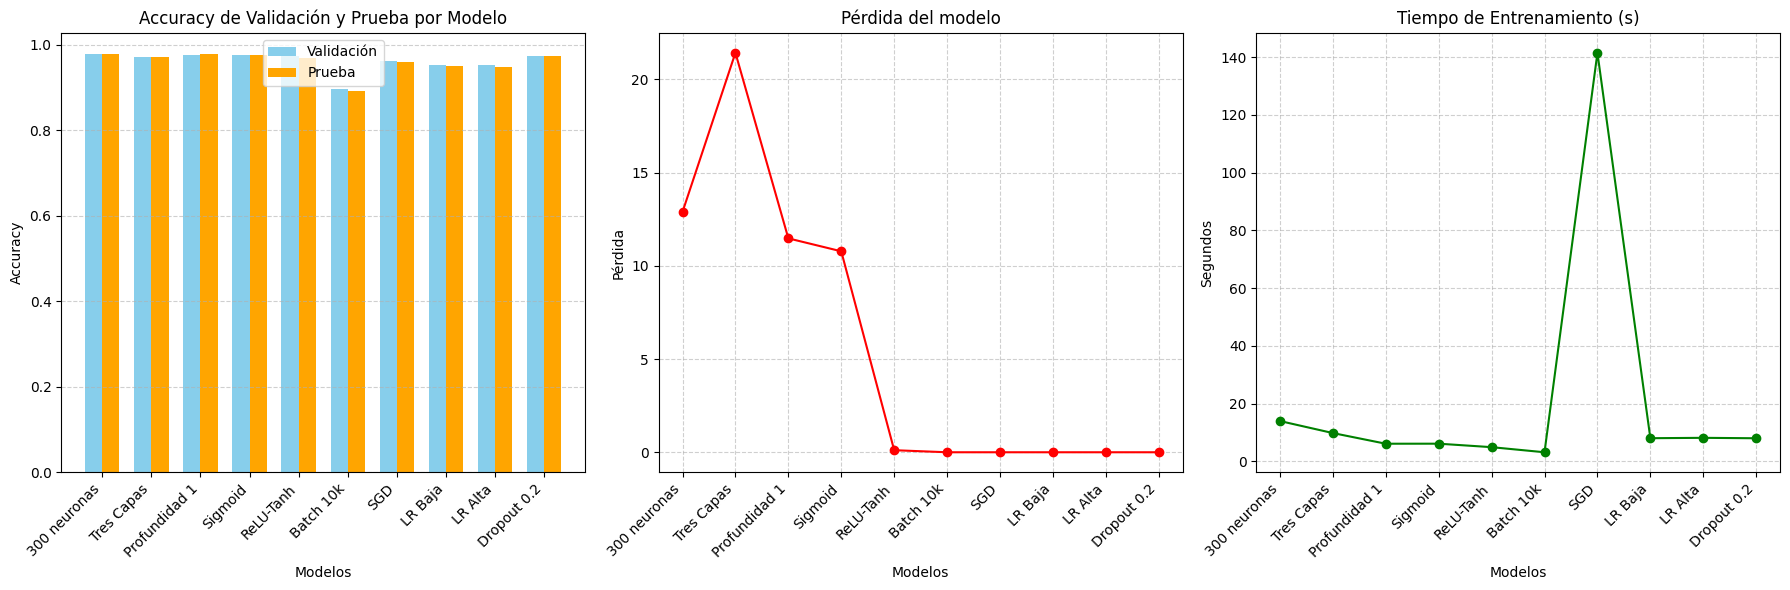

In [104]:
# Lista de resultados de modelos en forma [val_acc, test_acc, tiempo]
result_sets = [best_result_ms[1:], result_three, best_result_deep[1:], result_sigmoid, result_relu_tanh,
               [0.8978, 0.8923, 3.15], # Batch 10k
               [0.9612, 0.9593, 141.54], # SGD
               [0.9536, 0.9497, 8.02], # LR Baja
               [0.9538, 0.9488, 8.15], # LR Alta
               [0.9749, 0.9752, 8.0]] # Dropout 0.2

# Nombres para los modelos (puedes personalizarlos)
model_names = [str(best_result_ms[0]) + ' neuronas', 'Tres Capas', 'Profundidad ' + str(best_result_deep[0]), 'Sigmoid', 'ReLU-Tanh',
               'Batch 10k', 'SGD', 'LR Baja', 'LR Alta', 'Dropout 0.2']

# Separar métricas
val_accuracies = [res[0] for res in result_sets]
test_accuracies = [res[1] for res in result_sets]
times = [res[2] for res in result_sets]
loss = [res[3] if len(res) > 3 else 0.0 for res in result_sets]

# Posiciones para las barras
x = np.arange(len(model_names))
width = 0.35

# Crear figura con 2 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# --- Subplot 1: Accuracy de Validación y Prueba ---
axs[0].bar(x - width/2, val_accuracies, width, label='Validación', color='skyblue')
axs[0].bar(x + width/2, test_accuracies, width, label='Prueba', color='orange')

axs[0].set_xlabel("Modelos")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy de Validación y Prueba por Modelo")
axs[0].set_xticks(x)
axs[0].set_xticklabels(model_names, rotation=45, ha='right')
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Subplot 2: Pérdida en prueba ---
axs[1].plot(x, loss, marker='o', color='red')
axs[1].set_title("Pérdida del modelo")
axs[1].set_xlabel("Modelos")
axs[1].set_ylabel("Pérdida")
axs[1].set_xticks(x)
axs[1].set_xticklabels(model_names, rotation=45, ha='right')
axs[1].grid(True, linestyle='--', alpha=0.6)

# --- Subplot 3: Tiempo de Entrenamiento ---
axs[2].plot(x, times, marker='o', color='green')
axs[2].set_title("Tiempo de Entrenamiento (s)")
axs[2].set_xlabel("Modelos")
axs[2].set_ylabel("Segundos")
axs[2].set_xticks(x)
axs[2].set_xticklabels(model_names, rotation=45, ha='right')
axs[2].grid(True, linestyle='--', alpha=0.6)

# Ajustar diseño
plt.tight_layout()
plt.show()

## Modelo Óptimo Final

In [ ]:
# Modelo óptimo combinando mejores técnicas
def create_optimal_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.10),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Entrenar modelo óptimo
datos_train = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_val = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_test = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

datos_train = datos_train.shuffle(num_obs_entreno).batch(100)
datos_val = datos_val.batch(100)
datos_test = datos_test.batch(100)

model = create_optimal_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar
start_time = time.time()
history = model.fit(datos_train, validation_data=datos_val, epochs=10, verbose=0)
duration = time.time() - start_time

# Resultados
test_loss, test_acc = model.evaluate(datos_test, verbose=0)
val_acc = max(history.history['val_accuracy'])
train_acc = history.history['accuracy'][-1]

print("MODELO ÓPTIMO FINAL:")
print(f"Precisión validación: {val_acc:.4f} ({val_acc*100:.2f}%)")
print(f"Precisión prueba: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Tiempo: {duration:.2f}s")
print(f"Overfitting: {train_acc - val_acc:.4f}")



MODELO ÓPTIMO FINAL:
Precisión validación: 0.9816 (98.16%)
Precisión prueba: 0.9816 (98.16%)
Tiempo: 49.67s
Overfitting: 0.0102


### Decisiones de diseño
ARQUITECTURA:
* 3 capas [300,200,100]: Mejor balance profundidad/rendimiento
* Dropout 0.15/0.10: Regularización sin penalizar capacidad
* Batch 100, 10 épocas: Configuración probada óptima